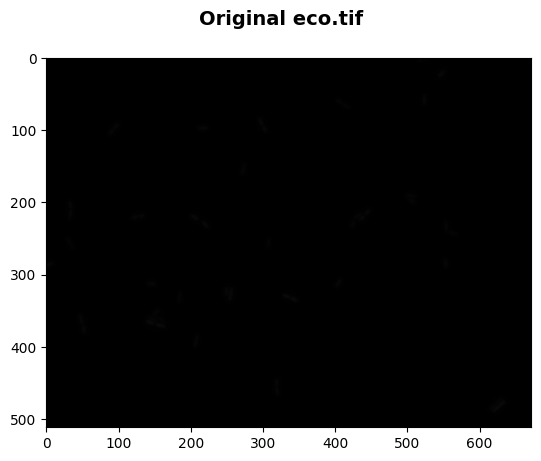

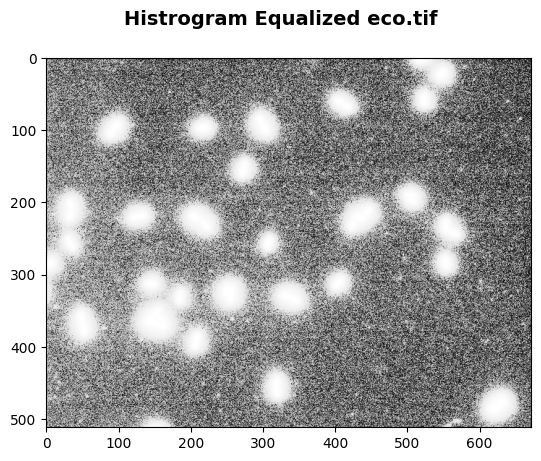

In [83]:
import numpy as np
import imageio.v2 as imageio
import matplotlib.pyplot as plt
import copy

L = 65536
# Implement This Function
def histeq(pic):
    # Follow the procedures of Histogram Equalizaion
    # Modify the pixel value of pic directly
    M = pic.shape[1]
    N = pic.shape[0]

    initialHistogram = np.zeros(L)

    for i in range(N):
        for j in range(M):
            initialHistogram[pic[i][j]] += 1    
    
    CDF = np.zeros(L) # could use the histogram to prevent creating another array in c++
    cdfMin = np.Inf #very large number
    for i in range(initialHistogram.shape[0]):
        if(i == 0):
            CDF[i] += initialHistogram[i]
        else:
            CDF[i] += CDF[i-1] + initialHistogram[i]
        if(CDF[i]< cdfMin):
            cdfMin = CDF[i]
    
    # return CDF
    for i in range(CDF.size):
        CDF[i] = np.round((CDF[i] - cdfMin)*(L-1)/(M*N - 1))
    # return CDF

    for i in range(N):
        for j in range(M):
            pic[i][j] = CDF[pic[i][j]]    
    return pic,CDF;

# Histogram Equilization
eco_origin = imageio.imread('eco.tif');
eco_histeq = copy.deepcopy(eco_origin);
# Call to histeq to perform Histogram Equilization
eco_histeq, cdf = histeq(eco_histeq);
# plt.plot(np.arange(eco_histeq.size), eco_histeq)

# Show the result in two windows
fig_eco_origin = plt.figure(1);
fig_eco_origin.suptitle('Original eco.tif', fontsize=14, fontweight='bold');
plt.imshow(eco_origin,cmap='gray',vmin = 0, vmax = 65535);
fig_eco_histeq = plt.figure(2)
fig_eco_histeq.suptitle('Histrogram Equalized eco.tif', fontsize=14, fontweight='bold');
plt.imshow(eco_histeq,cmap='gray',vmin = 0, vmax = 65535);
plt.show()

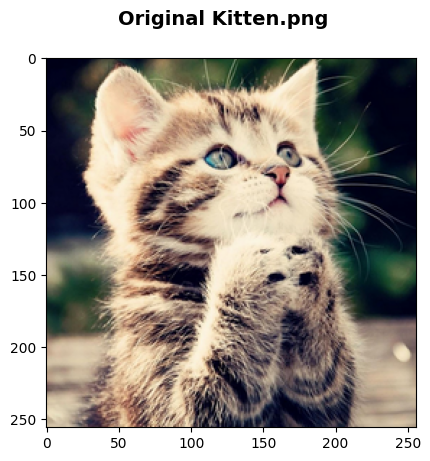

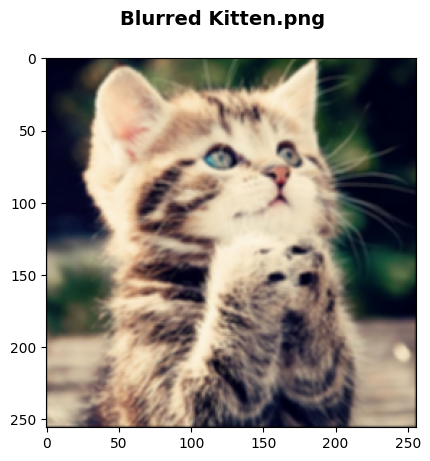

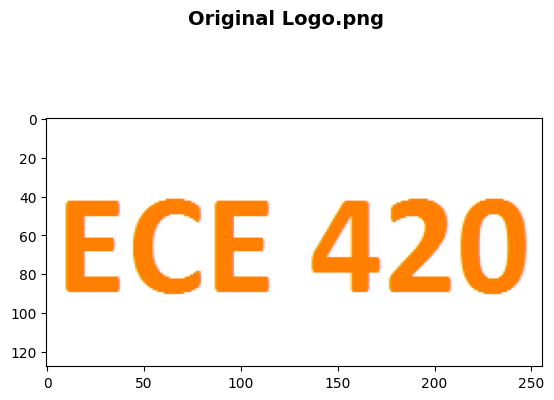

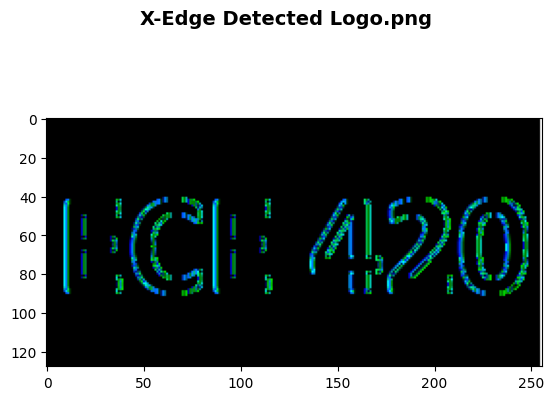

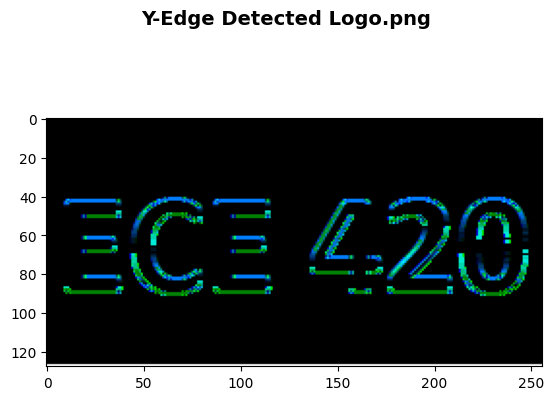

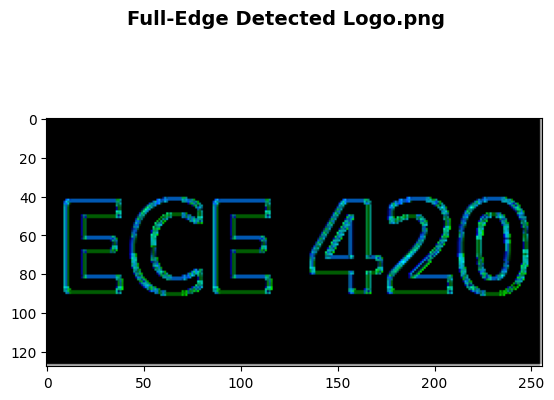

In [95]:
import numpy
from scipy import misc
import matplotlib.pyplot as plt
from scipy import signal

# Function Definition Here

# Implement This funtion
def conv2(pic,kernel):
    # Create a new pic with same size but float type
    pic_conv = numpy.zeros(numpy.shape(pic))
    # Perform 2-D Convolution with the given kernel
    tempKernel = np.zeros_like(kernel)

    #should be same
    W = kernel.shape[0]//2
    H = kernel.shape[1]//2

    #flipping
    a = 0
    b= 0 
    for i in range(kernel.shape[0]-1, -1, -1):
        for j in range(kernel.shape[1]-1, -1, -1):
            tempKernel[i][j] = kernel[a][b]
            b+=1
        b= 0
        a+=1

    for col in range(3):
        for x in range(pic.shape[0]):
            for y in range(pic.shape[1]):
                for i in range(kernel.shape[0]):
                    for j in range(kernel.shape[1]):
                        if ((x-W + i) < 0 or (y - H + j) < 0 or (x-W + i) >= pic.shape[0] or (y - H + j) >= pic.shape[1]):
                            continue
                        pic_conv[x][y][col] += pic[x-W + i][y - H + j][col] * tempKernel[i][j]
                        
    return pic_conv.astype('uint8')

    
# Gaussian Kernel Following the Descriptiong: http://www.mathworks.com/help/images/ref/fspecial.html
def gengaussian(size=5,sigma=3.0):
    if size%2==0 or size<2:
        print('Size Not Valid');
        return None;
    kernel = numpy.zeros((size,size));
    for x in range(size):
        for y in range(size):
            kernel[x][y] = numpy.exp(-((x-(size-1)/2)**2+(y-(size-1)/2)**2)/(2*sigma**2));
    kernel = kernel / numpy.sum(kernel);
    return kernel

# Edge Detection Kernel Source:https://alwaysbusycorner.com/2011/12/02/realbasic-canvas-tutorial-lesson-11-edge-detection-kernel-builder/  
def genxkernel(flag=1):
    if flag == 1:
        kernel = numpy.array([[-1,0,1]]*3);
    else:
        kernel = numpy.array([[-1,0,1],[-2,0,-2],[-1,0,-1]]);
    return kernel

def genykernel(flag=1):
    if flag == 1:
        kernel = numpy.array([[-1,-1,-1],[0,0,0],[1,1,1]]);
    else:
        kernel = numpy.array([[-1,-2,-1],[0,0,0],[1,2,1]]);
    return kernel

# Merge Detected X-Edge and Y-Edge
def merge(picx,picy):
    picshape = numpy.shape(picx);
    if picshape != numpy.shape(picy):
        print('Pic Size Not Matched!');
        return picx;
    picmerge = numpy.zeros(picshape);
    for row in range(picshape[0]):
        for col in range(picshape[1]):
            for channel in range(picshape[2]):
                picmerge[row][col][channel] = numpy.sqrt((picx[row][col][channel]**2+picy[row][col][channel]**2)/2);
    picmerge = picmerge.astype(picx.dtype,copy=False);
    return picmerge;
    
# Main Function Starts Here!!!
# Gaussian Blur Kernel
# Read Image and Display
kitten_origin = imageio.imread('kitten.png');
fig_kitten_origin = plt.figure(1);
fig_kitten_origin.suptitle('Original Kitten.png', fontsize=14, fontweight='bold');
plt.imshow(kitten_origin,vmin = 0, vmax = 255);
plt.show(block=False);
# Generate Kernel
kernel_blur = gengaussian(3);
# Apply Convolution
kitten_blur = conv2(kitten_origin,kernel_blur)
# Display Results
fig_kitten_blur = plt.figure(2);
fig_kitten_blur.suptitle('Blurred Kitten.png', fontsize=14, fontweight='bold');
plt.imshow(kitten_blur,vmin = 0, vmax = 255);
plt.show(block=False);

# Edge Detection Kernel
# Read Image and Display
logo_origin = imageio.imread('logo.png');
fig_logo_origin = plt.figure(3);
fig_logo_origin.suptitle('Original Logo.png', fontsize=14, fontweight='bold');
plt.imshow(logo_origin,vmin = 0, vmax = 255);
plt.show(block=False);
# X-Edge Detection
kernel_xedge = genxkernel();
logo_xedge = conv2(logo_origin,kernel_xedge)
fig_logo_xedge = plt.figure(4);
fig_logo_xedge.suptitle('X-Edge Detected Logo.png', fontsize=14, fontweight='bold');
plt.imshow(logo_xedge,vmin = 0, vmax = 255);
plt.show(block=False);
# Y-Edge Detection
kernel_yedge = genykernel();
logo_yedge = conv2(logo_origin,kernel_yedge)
fig_logo_yedge = plt.figure(5);
fig_logo_yedge.suptitle('Y-Edge Detected Logo.png', fontsize=14, fontweight='bold');
plt.imshow(logo_yedge,vmin = 0, vmax = 255);
plt.show(block=False);
# Merge Edges
logo_fulledge = merge(logo_xedge,logo_yedge);
fig_logo_fulledge = plt.figure(6);
fig_logo_fulledge.suptitle('Full-Edge Detected Logo.png', fontsize=14, fontweight='bold');
plt.imshow(logo_fulledge,vmin = 0, vmax = 255);
plt.show();